In [6]:
#load images paths

from helper import listImgDir, image_to_pixels  
beansImages = {}
labels_data = ['angular_leaf_spot', 'bean_rust', 'healthy']
for label in labels_data:
    directory = 'dataset beans/train/' + label
    beansImages[label] = listImgDir(directory)
    print (f"Total of {label} leaves: {len(beansImages[label])}")

Total of angular_leaf_spot leaves: 345
Total of bean_rust leaves: 348
Total of healthy leaves: 341


In [ ]:
class BeansLeavsImages:
    angular_leaf_spot = []
    bean_rust = []
    healthy = []

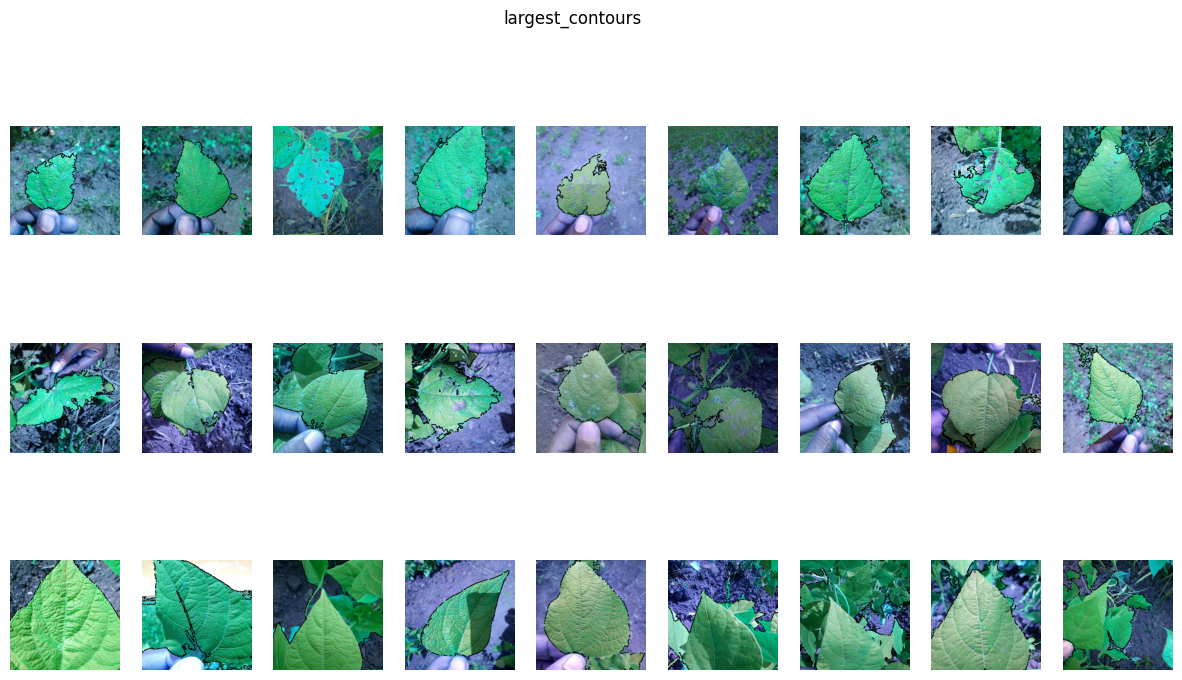

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def identifyLeaf(imagePath):
  
    # for i, contour in enumerate(largest_contours, 1):
    #     area = cv2.contourArea(contour)
    #     print(f"Area of contour {i}: {area}")



    # Find the largest contour (main object)
    #main_contour = max(contours, key=cv2.contourArea)

    # Get the bounding rectangle of the contour
    # x, y, w, h = cv2.boundingRect(main_contour)

    # # Add padding of 20 pixels
    # padding = 5
    # x -= padding
    # y -= padding
    # w += 2 * padding
    # h += 2 * padding

    # # Ensure the coordinates and dimensions are within the image boundaries
    # x = max(x, 0)
    # y = max(y, 0)
    # w = min(w, image.shape[1] - x)
    # h = min(h, image.shape[0] - y)

    # Draw the rectangle with padding on the original image
    # result_image = image.copy()
    # cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Draw the contour of the main object
    cv2.drawContours(image, largest_contours, -1, (0, 0, 0), 3)
    # kernel = np.ones((9,9), np.uint8)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # # put mask into alpha channel of result
    # result = image.copy()
    # result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
    # result[:, :, 3] = mask
    return image
    
def loadImage(imagePath):
    return cv2.imread(imagePath)
def findGreenAreaInImage(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define range of green color in HSV
    lower_green = np.array([35, 20, 50])
    upper_green = np.array([85, 255, 255])

    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(hsv, lower_green, upper_green)
    #Apply dilation to the mask to add padding
    # kernel = np.ones((5, 5), np.uint8)  # Adjust the kernel size for the desired padding
    # mask = cv2.dilate(mask, kernel, iterations=1)

    #Bitwise-AND mask and original image
    green_object = cv2.bitwise_and(image, image, mask=mask)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def fingLeafContour(contours):
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

        # Get the two largest contours
    largest_contours = contours[:2]
    if(len(largest_contours) == 1) :
        return largest_contours[0]
    # Print the area of the two biggest contours
    biggest_area = cv2.contourArea(largest_contours[0])

    almost_biggest_area = cv2.contourArea(largest_contours[1])
    if(almost_biggest_area > 0) :
        if (biggest_area / almost_biggest_area > 4) :
            return largest_contours[0]
        else :
            return []
    return largest_contours[0]

def drawLeavs3X9Gallery(beanLeavsImages):
    # draw the image
    fig, axarr = plt.subplots(3, 9, figsize=(15,8))
    fig.suptitle("largest_contours")
    row = 0
    for label, beansImagesByLabel in beanLeavsImages.items():
        for coulmn, beanImage in enumerate(beansImagesByLabel[:leavsLimit]):
            axarr[row][coulmn].imshow(beanImage)
            axarr[row][coulmn].axis('off')
        row+=1
    plt.show()

labels_data = ['angular_leaf_spot', 'bean_rust', 'healthy']
onlyLeavsImages = {}
for label in labels_data :
    onlyLeavsImages[label] =[]
leavsLimit = 9
itemInRow = 3
for label, beansImagesByLabel in beansImages.items():
    for beanImage in beansImagesByLabel[:leavsLimit]:
        image = loadImage(beanImage)
        contours = findGreenAreaInImage(image)
        leafCounter = fingLeafContour(contours)
        if(len(leafCounter) > 0) :
            onlyLeavsImages[label].append(cv2.drawContours(image, leafCounter, -1, (0, 0, 0), 3))
        else :
            onlyLeavsImages[label].append(image)

drawLeavs3X9Gallery(onlyLeavsImages)




dataset beans/train/healthy/healthy_train.56.jpg


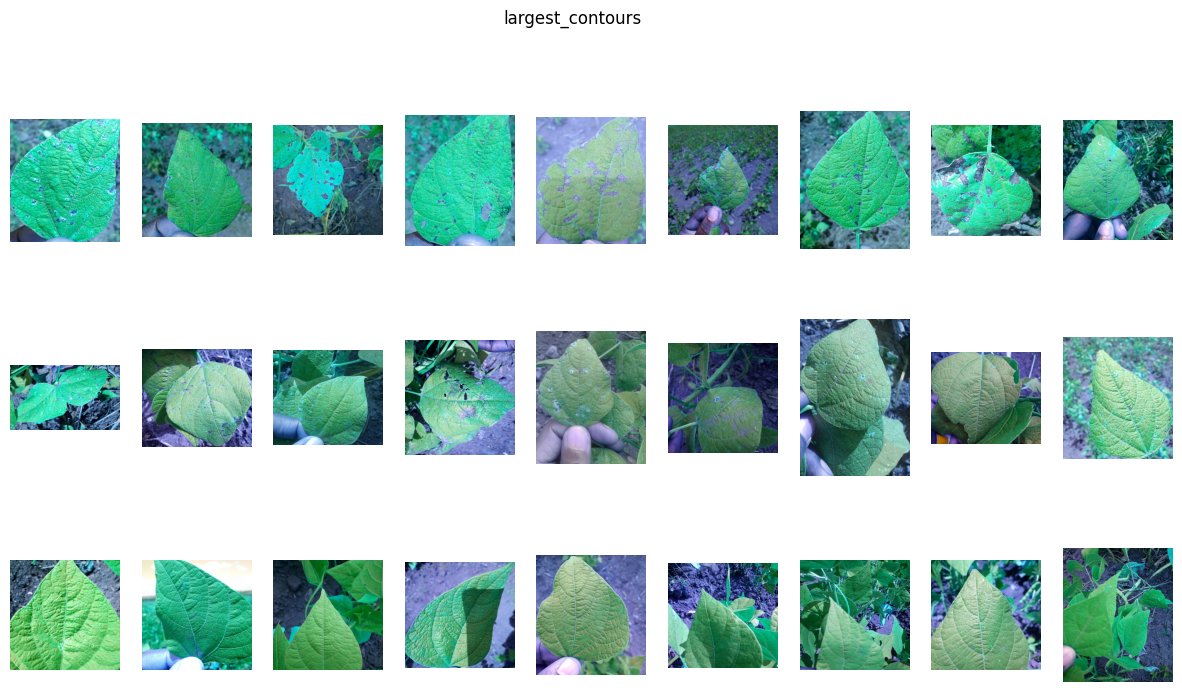

In [69]:
def cropLeafImage(image, contour):
   x,y,w,h= cv2.boundingRect(contour)
   return image[y:y+h, x:x+w]

croppedBeansLeavsImages = {}
for label in labels_data :
    croppedBeansLeavsImages[label] =[]
for label, beansImagesByLabel in beansImages.items():
    for beanImage in beansImagesByLabel[:20]:
        if(beanImage =='dataset beans/train/healthy/healthy_train.56.jpg'):
            print(beanImage)
        image = loadImage(beanImage)
        contours = findGreenAreaInImage(image)
        leafCounter = fingLeafContour(contours)
        if(len(leafCounter) > 0):
            croppedImage = cropLeafImage(image, leafCounter)
            croppedBeansLeavsImages[label].append(croppedImage)
        else:
            croppedBeansLeavsImages[label].append(image)

drawLeavs3X9Gallery(croppedBeansLeavsImages)
        
        

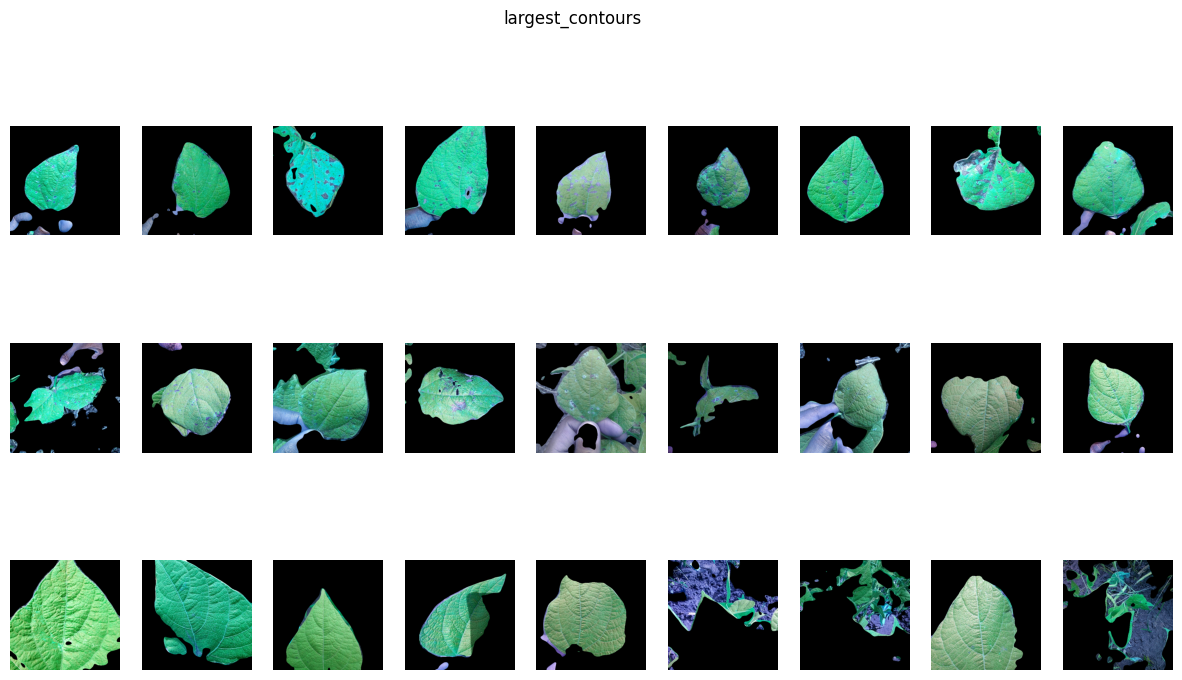

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage

results = {}
for label in labels_data :
    results[label] =[]
for label, beansImagesByLabel in beansImages.items():
    for beanImage in beansImagesByLabel[:20]:
        image = loadImage(beanImage)

        laplacian_spread_distance = 10  # distance to spread laplacian in pixels
        wire_threshold = 80  # Out of 255. Higher values mean less of the image is kept.

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        fm = np.abs(cv2.Laplacian(gray, cv2.CV_64F))
        lp_spread_distance=10
        fm = scipy.ndimage.gaussian_filter(fm, sigma=lp_spread_distance)
        fm /= fm.max() / 255
        fm = fm.astype('uint8')
        ret2, thresholded = cv2.threshold(fm, wire_threshold, 1, cv2.THRESH_BINARY)
        extracted = thresholded.reshape(image.shape[:2] + (1,)) * image
        results[label].append(extracted)

drawLeavs3X9Gallery(results)